# In the Wake of the Great Resignation: Predicting Employee Churn


## Exploratory Data Analysis

In [358]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [357]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,  plot_tree

In [293]:
employee = pd.read_csv('../data/employee.csv')
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [294]:
# Check data size and type
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [295]:
# Check missing data
employee.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

#### There is no missing data


### Explore unique values in categorical variables

In [296]:
# Counts of unique values in Education
employee['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [297]:
# Counts of unique values in JoiningYear
employee['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [298]:
# Counts of unique values in City
employee['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [299]:
# Counts of unique values in PaymentTier
employee['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [300]:
# Counts of unique values in Gender
employee['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [301]:
# Counts of unique values in EverBenched
employee['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [302]:
# Counts of unique values in ExperienceInCurrentDomain
employee['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

In [303]:
# Counts of unique values in LeaveOrNot
employee['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

### Check outliers

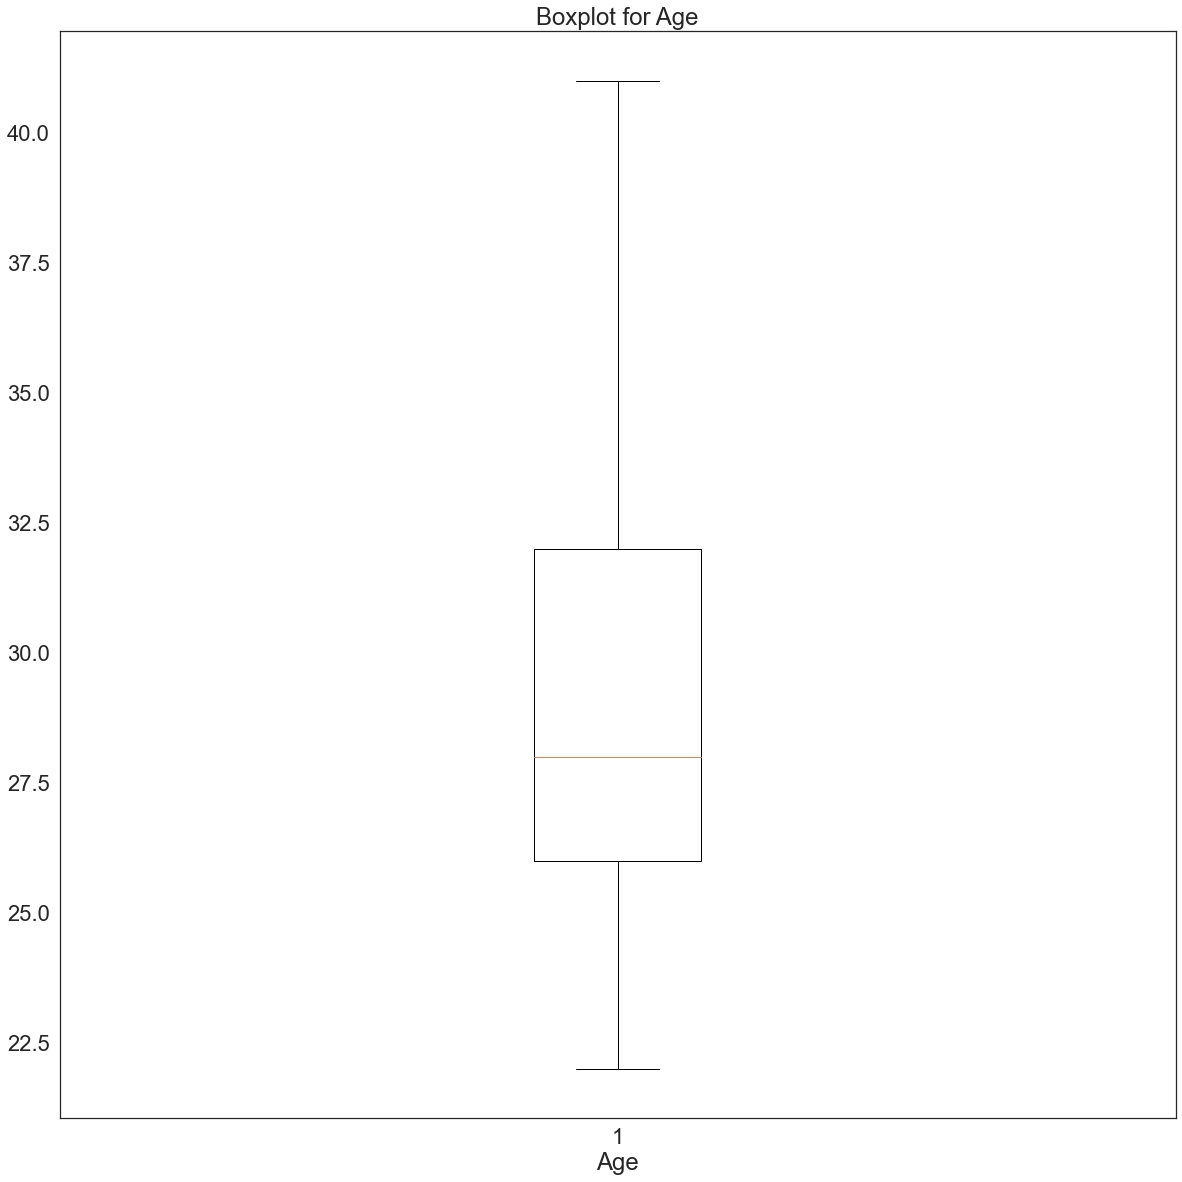

In [304]:
# Boxplot to observe ouliers for Age

fig = plt.figureSize = ((5,8))
plt.boxplot(employee['Age'])
plt.xlabel('Age')
plt.title('Boxplot for Age')
plt.show()

### Check for duplication

In [305]:
dups = employee.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1889


In [306]:
duplicate_row = employee[dups]
duplicate_row

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


**<font color="red"> -->Large number of duplication. Could be due to synthetic values? or due to pre-process of balancing data? Keep or discard? </font>**

### Drop duplicates

In [307]:
employee = employee.drop_duplicates(ignore_index=True)

In [308]:
# Check data size and type after drop duplicates
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


In [309]:
# Counts of unique values in LeaveOrNot
#Check the balance of the data after dropping duplicates
employee['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

#### The data is  balance --> no need for rebalancing

#### Display the summary for all the attributes simultaneously in a table . For quantitative attritbutes, it will display their mean, standard deviation and various quantiles (including minimum, median, and maximum) values. For qualitative attributes, it will display its number of unique values and the top (most frequent) values.

In [310]:
# Table of summary statistics 
employee.describe(include='all').round(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,2764,2764.00,2764,2764.00,2764.00,2764,2764,2764.00,2764.00
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,1971,NaN,1171,NaN,NaN,1529,2403,NaN,NaN
mean,NaN,2015.09,NaN,2.64,30.95,NaN,NaN,2.64,0.39
std,NaN,1.89,NaN,0.62,5.11,NaN,NaN,1.61,0.49
min,NaN,2012.00,NaN,1.00,22.00,NaN,NaN,0.00,0.00
25%,NaN,2013.00,NaN,2.00,27.00,NaN,NaN,1.00,0.00
50%,NaN,2015.00,NaN,3.00,30.00,NaN,NaN,2.00,0.00
75%,NaN,2017.00,NaN,3.00,35.00,NaN,NaN,4.00,1.00


### Transform data 

#### Transform JoiningYear into Duration. With the latest data collected was in 2018, the task is to predict  whether the employees will churn in the next two years assuming it would be in 2020. 

In [311]:
employee['Duration'] = 2020 - employee['JoiningYear']
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Duration
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,7
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,6
3,Masters,2016,Bangalore,3,27,Male,No,5,1,4
4,Masters,2017,Pune,3,24,Male,Yes,2,1,3


In [312]:
# Counts of unique values in Duration
employee['Duration'].value_counts()

3    662
5    464
7    396
6    385
4    310
8    308
2    239
Name: Duration, dtype: int64

#### Drop "JoiningYear"

In [313]:
employee = employee.drop(['JoiningYear'], axis=1)
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   City                       2764 non-null   object
 2   PaymentTier                2764 non-null   int64 
 3   Age                        2764 non-null   int64 
 4   Gender                     2764 non-null   object
 5   EverBenched                2764 non-null   object
 6   ExperienceInCurrentDomain  2764 non-null   int64 
 7   LeaveOrNot                 2764 non-null   int64 
 8   Duration                   2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


### Explore variable relationships

In [314]:
print('Correlation:')
employee.corr()

Correlation:


,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Duration
PaymentTier,1.000000,0.067514,-0.004602,-0.119891,0.053823
Age,0.067514,1.000000,-0.053276,-0.114943,-0.024445
ExperienceInCurrentDomain,-0.004602,-0.053276,1.000000,-0.021181,0.031228
LeaveOrNot,-0.119891,-0.114943,-0.021181,1.000000,-0.150650
Duration,0.053823,-0.024445,0.031228,-0.150650,1.000000


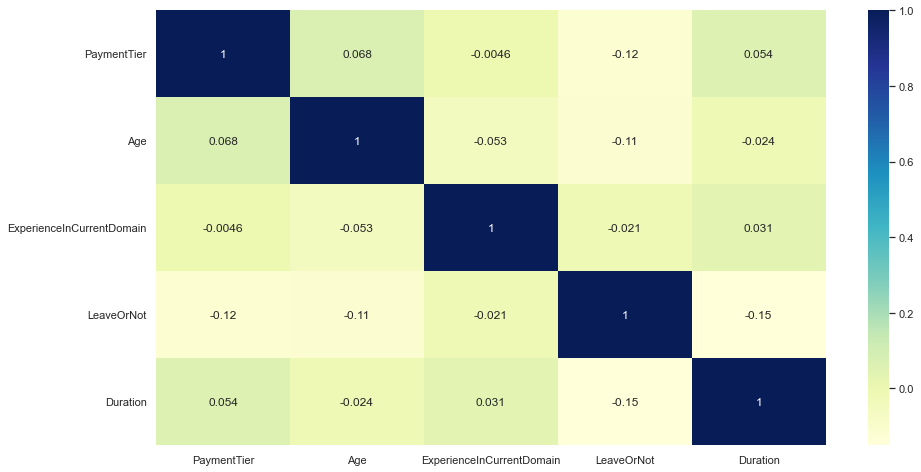

In [315]:
# plot the heatmap and annotation on it
#Correlation matrix 
corr_matrix_test = employee.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix_test, cmap="YlGnBu", annot=True)
plt.show()

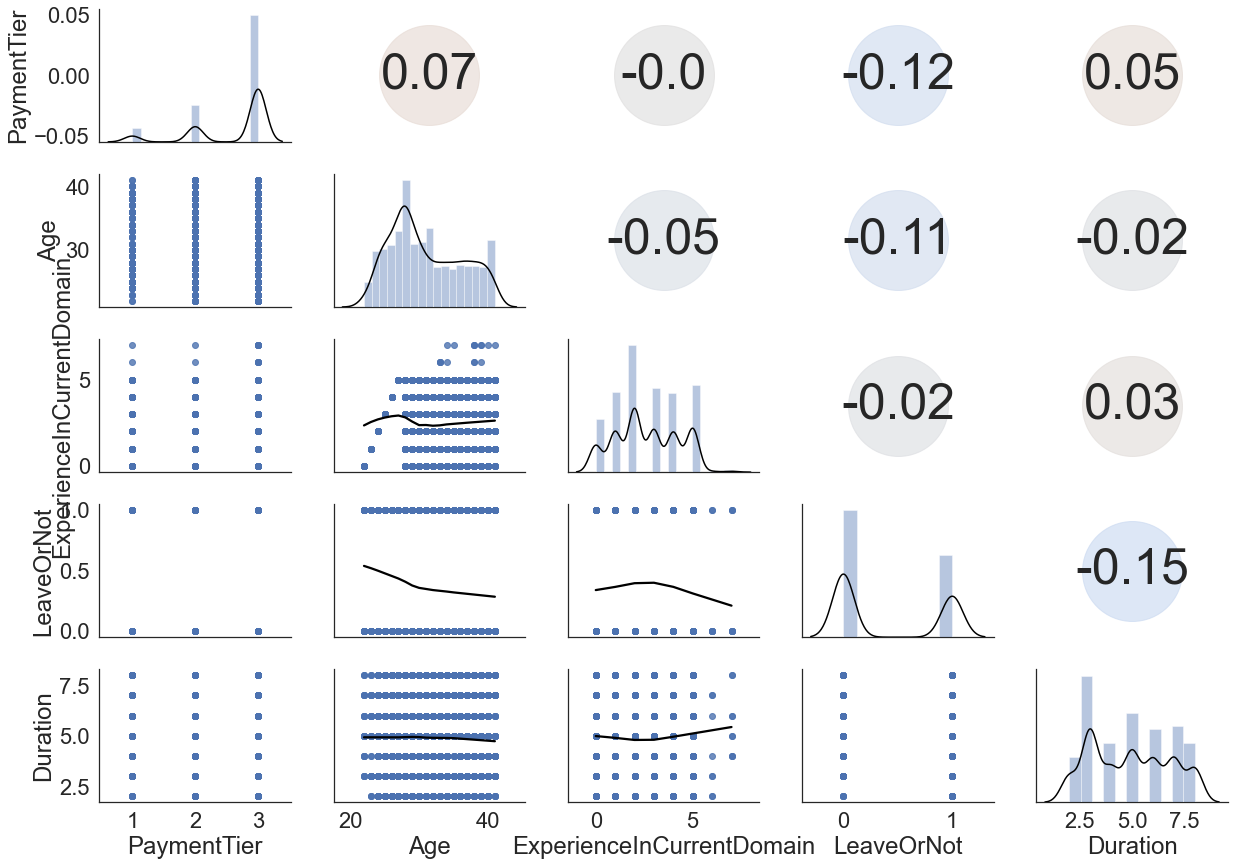

In [316]:
#Create Plot and correlation matrix for selected feature
def corrdot(*args, **kwargs):
    employee = round (args[0].corr(args[1], 'pearson'), 2)
    corr_text = f"{employee:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000
    ax.scatter([.5], [.5], marker_size, [ employee], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 50
    ax.annotate( employee, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=2.0)
g = sns.PairGrid( employee, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show()

#### Histogram of Education with overlay of LeaveOrNot

Contingency table:
LeaveOrNot     0    1
Education            
Bachelors   1232  739
Masters      328  309
PHD          116   40
Normalized contingency table:
LeaveOrNot         0         1
Education                     
Bachelors   0.625063  0.374937
Masters     0.514914  0.485086
PHD         0.743590  0.256410


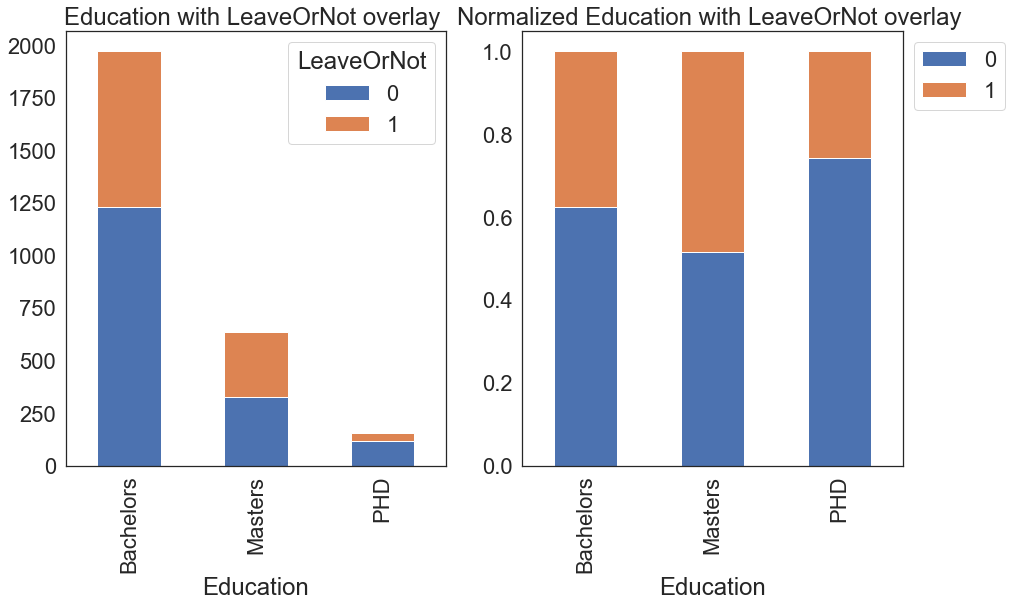

In [317]:
crosstab = pd.crosstab(employee["Education"], employee["LeaveOrNot"])
print('Contingency table:')
print(crosstab)

#creat a normalized contingency table by divide each cell by its row total
crosstab_norm = crosstab.div(crosstab.sum(1), axis=0)
print('Normalized contingency table:')
print(crosstab_norm)

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (20, 20)

crosstab.plot.bar(ax=ax1, stacked=True)
ax1.set_title("Education with LeaveOrNot overlay ")

crosstab_norm.plot.bar(ax=ax2, stacked = True)
ax2.set_title("Normalized Education with LeaveOrNot overlay ")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### Histogram of Everbenched with overlay of LeaveOrNot

Contingency table:
LeaveOrNot      0    1
EverBenched           
No           1474  929
Yes           202  159
Normalized contingency table:
LeaveOrNot          0         1
EverBenched                    
No           0.613400  0.386600
Yes          0.559557  0.440443


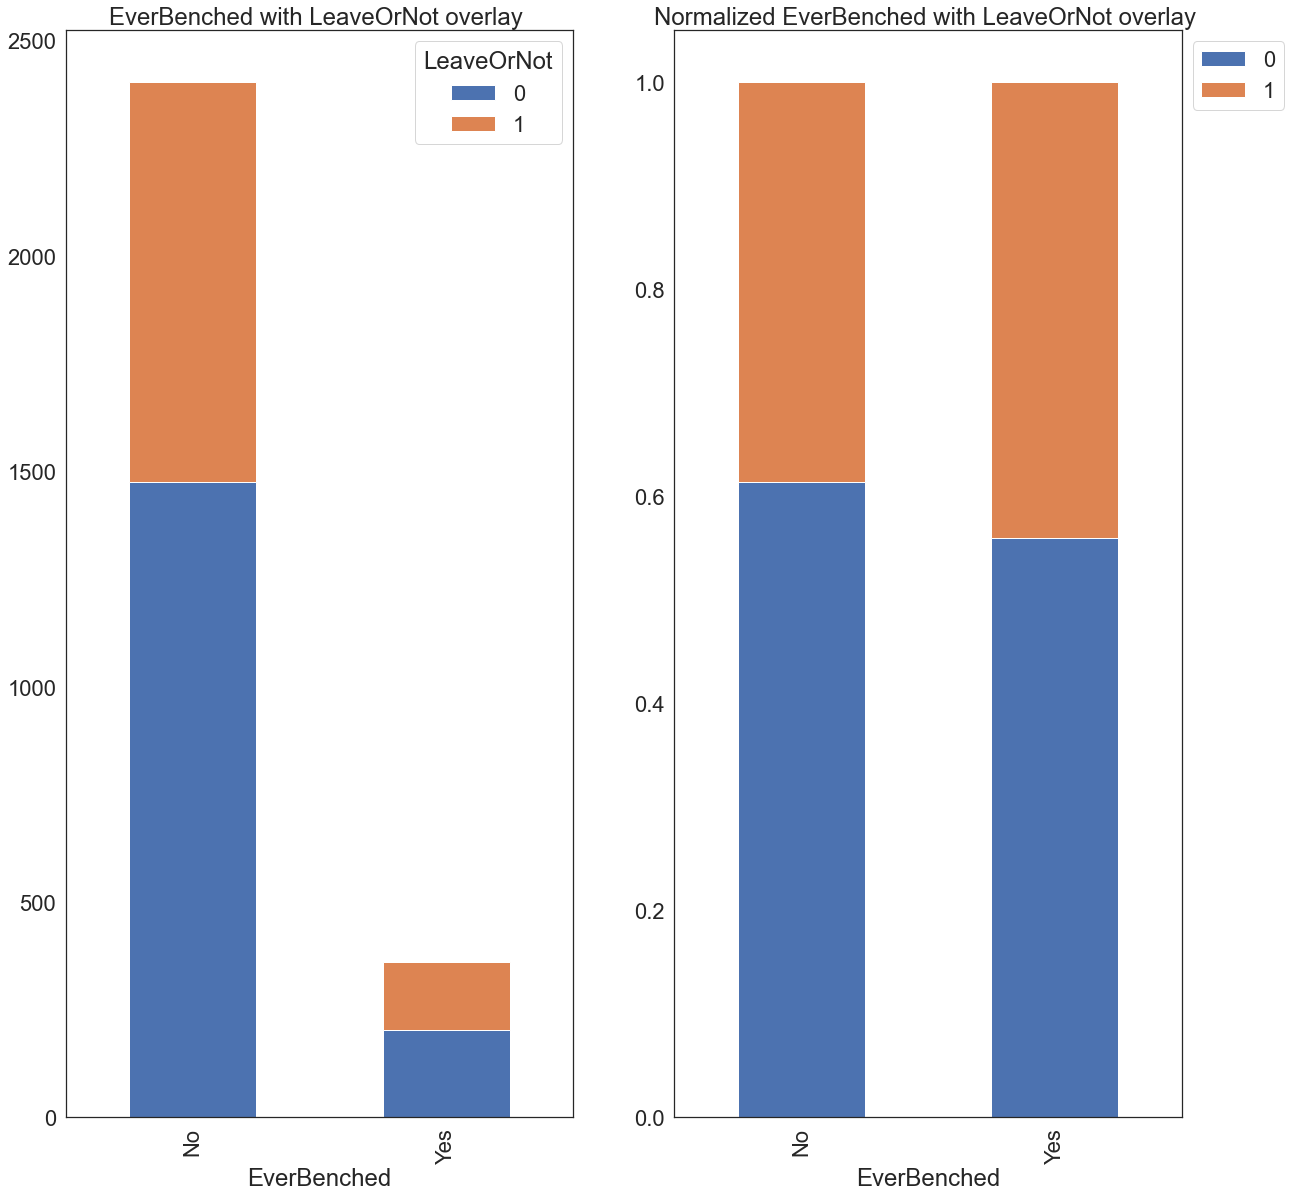

In [318]:
crosstab2 = pd.crosstab(employee["EverBenched"], employee["LeaveOrNot"])
print('Contingency table:')
print(crosstab2)

#creat a normalized contingency table by divide each cell by its row total
crosstab_norm2 = crosstab2.div(crosstab2.sum(1), axis=0)
print('Normalized contingency table:')
print(crosstab_norm2)

fig, (ax1, ax2) = plt.subplots(1, 2)
#plt.rcParams["figure.figsize"] = (20,10)

crosstab2.plot.bar(ax=ax1, stacked=True)
ax1.set_title("EverBenched with LeaveOrNot overlay ")

crosstab_norm2.plot.bar(ax=ax2, stacked = True)
ax2.set_title("Normalized EverBenched with LeaveOrNot overlay ")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### Histogram of Age with overlay of LeaveOrNot

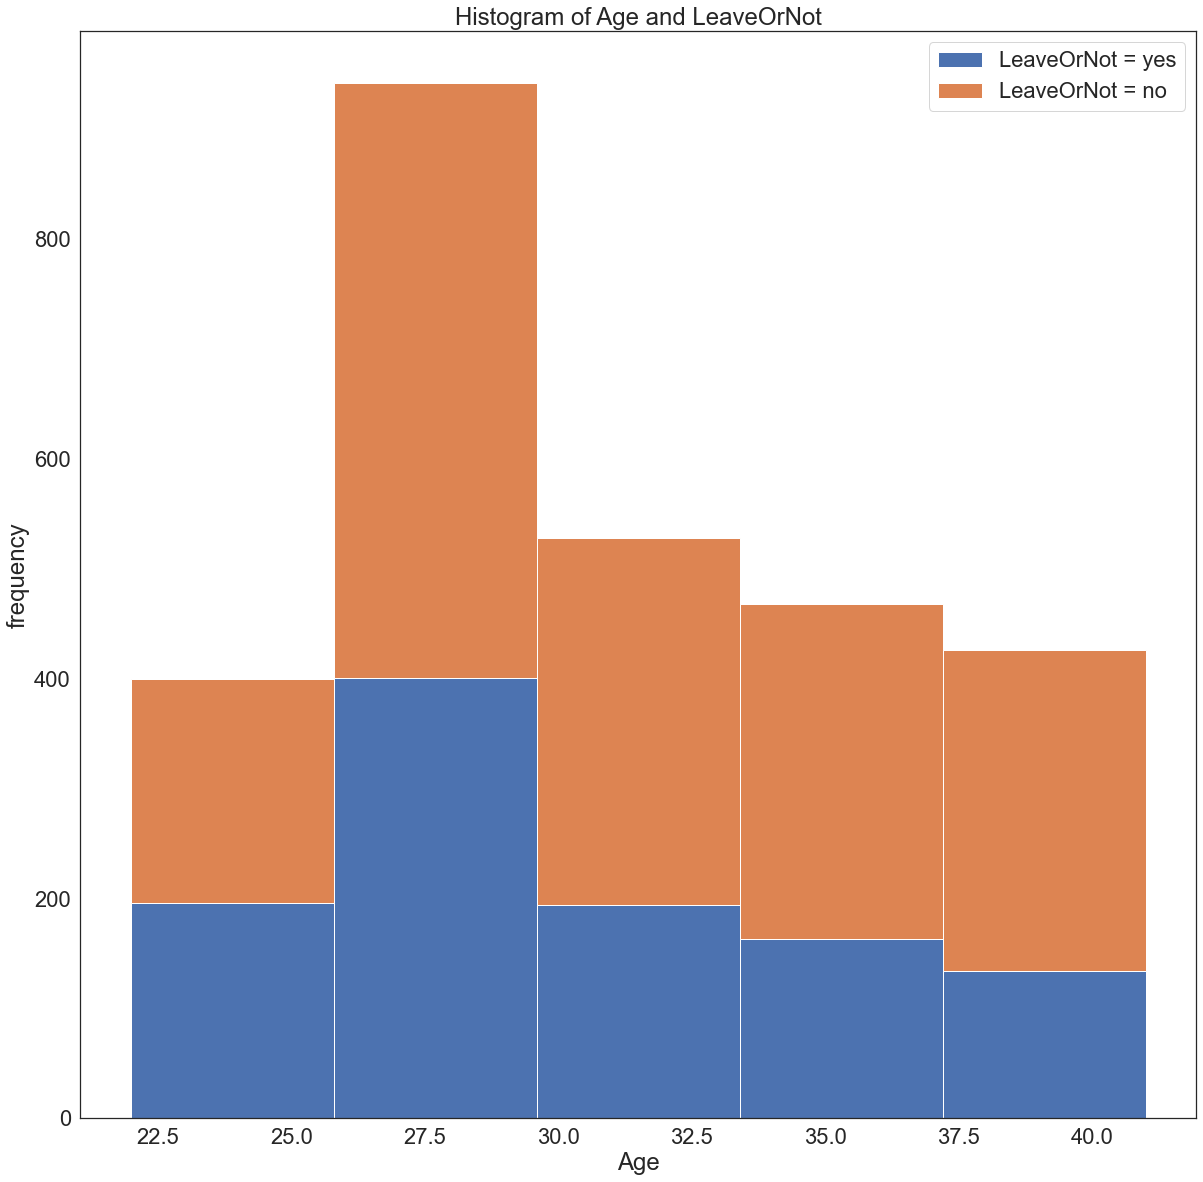

In [319]:
#separate Age according to LeaveOrNot
employee_y =employee[employee.LeaveOrNot == 1]['Age']
employee_n = employee[employee.LeaveOrNot == 0]['Age']

#creat histogram of the above variable
(n, bins, patches)= plt.hist([employee_y,employee_n], bins= 5, stacked= True)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend(['LeaveOrNot = yes', 'LeaveOrNot = no'])
plt.title('Histogram of Age and LeaveOrNot')
plt.show()

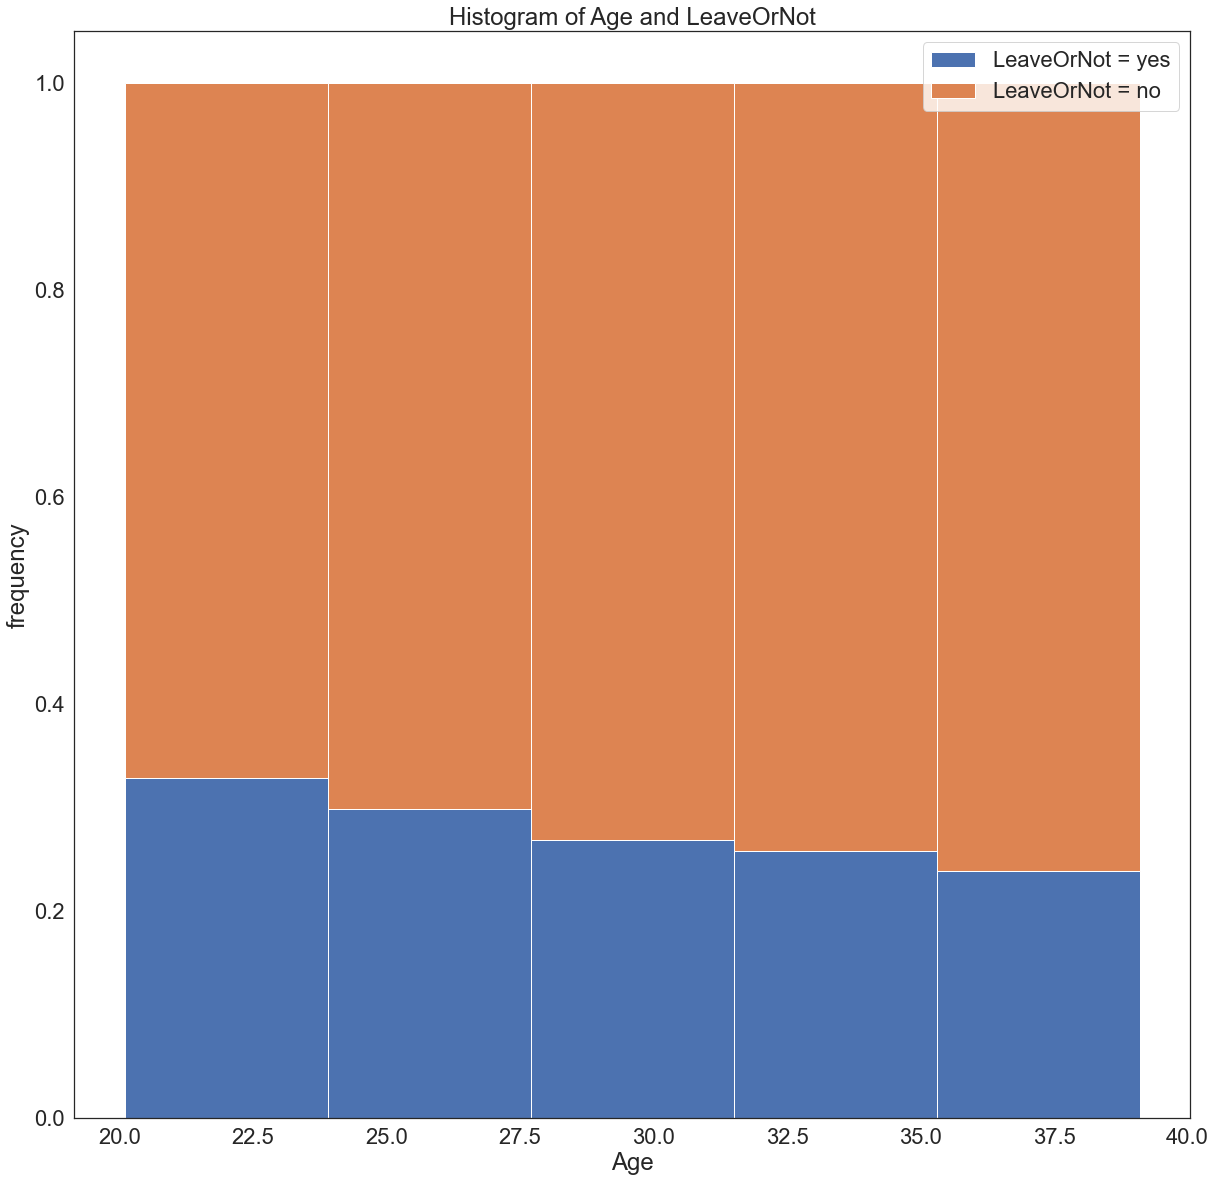

In [320]:
n_table = np.column_stack((n[0], n[1])) #create two column matrix (see book_practice file)
n_norm = n_table/ n_table.sum (axis =1)[:, None]
ourbins = np.column_stack((bins[0:5], bins[1:6]))
p1 = plt.bar(x= ourbins[:,0], height = n_norm [:,0], \
             width = ourbins[:,1] - ourbins[:,0])
p2 = plt.bar(x= ourbins[:,0], height = n_norm [:,1], \
             width = ourbins[:,1] - ourbins[:,0], bottom = n_norm[:,0])
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend(['LeaveOrNot = yes', 'LeaveOrNot = no'])
plt.title('Histogram of Age and LeaveOrNot')
plt.show()

Contingency table:
LeaveOrNot    0    1
Duration            
2             5  234
3           461  201
4           222   88
5           272  192
6           266  119
7           225  171
8           225   83
Normalized contingency table:
LeaveOrNot         0         1
Duration                      
2           0.020921  0.979079
3           0.696375  0.303625
4           0.716129  0.283871
5           0.586207  0.413793
6           0.690909  0.309091
7           0.568182  0.431818
8           0.730519  0.269481


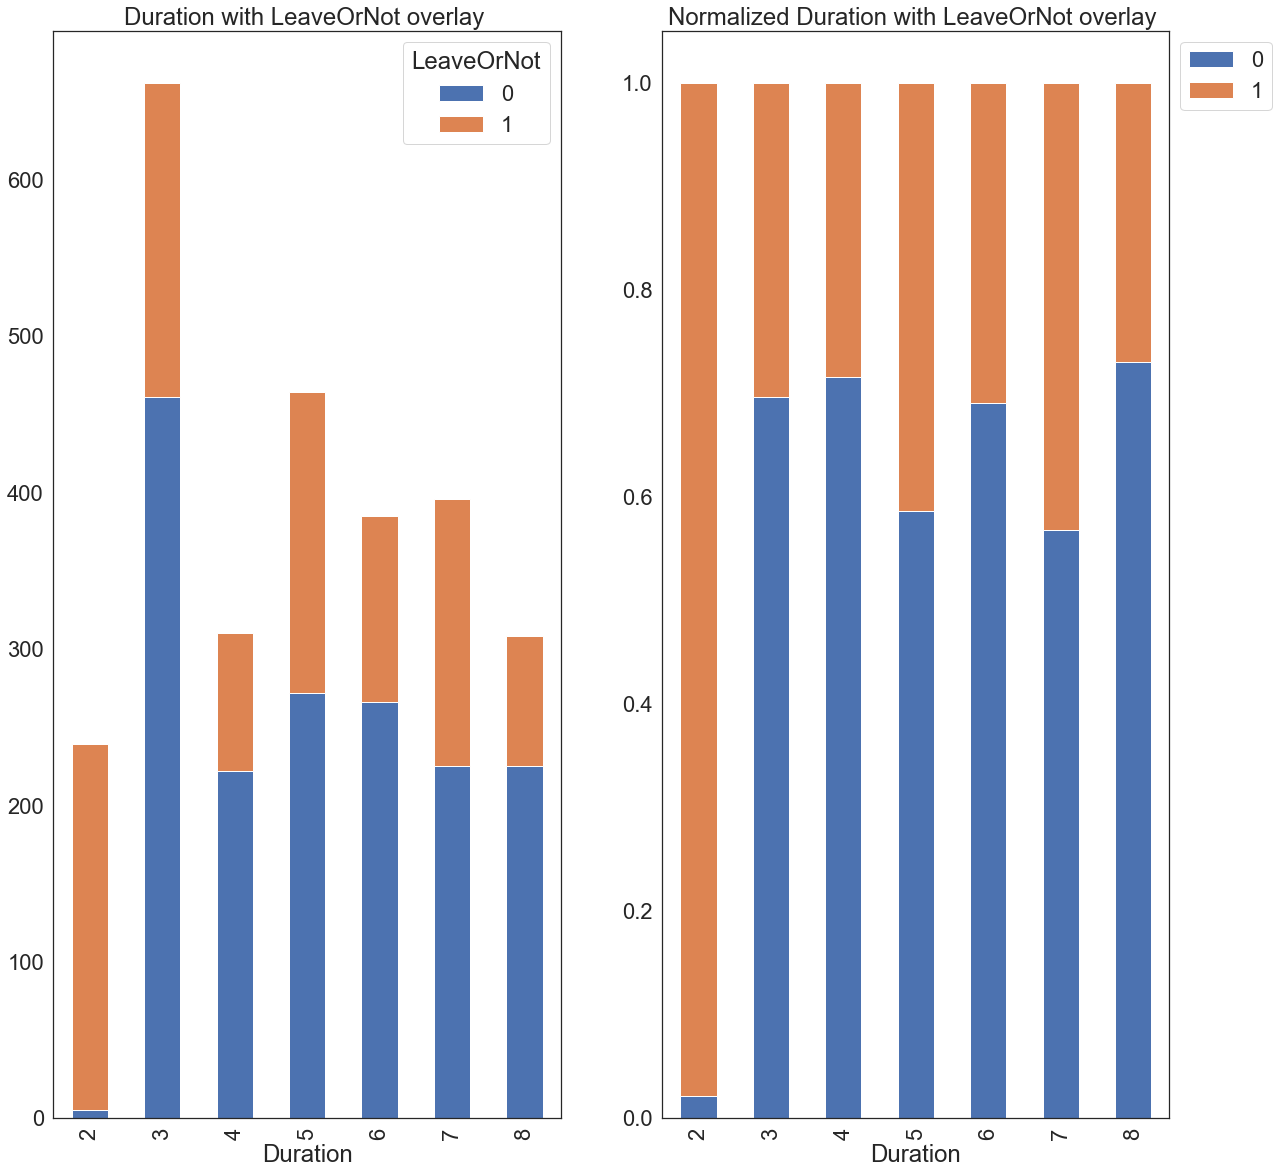

In [321]:
crosstab3 = pd.crosstab(employee["Duration"], employee["LeaveOrNot"])
print('Contingency table:')
print(crosstab3)

#creat a normalized contingency table by divide each cell by its row total
crosstab_norm3 = crosstab3.div(crosstab3.sum(1), axis=0)
print('Normalized contingency table:')
print(crosstab_norm3)

fig, (ax1, ax2) = plt.subplots(1, 2)
#plt.rcParams["figure.figsize"] = (20,10)

crosstab3.plot.bar(ax=ax1, stacked=True)
ax1.set_title("Duration with LeaveOrNot overlay ")

crosstab_norm3.plot.bar(ax=ax2, stacked = True)
ax2.set_title("Normalized Duration with LeaveOrNot overlay ")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

#### --> Two year long employees seem more likely to leave the company

## Split the data into training and test sets

In [347]:
employee_train, employee_test = train_test_split(employee, test_size = 0.25, random_state = 7)
print(employee.shape)
print(employee_train.shape)
print(employee_test.shape)

(2764, 9)
(2073, 9)
(691, 9)


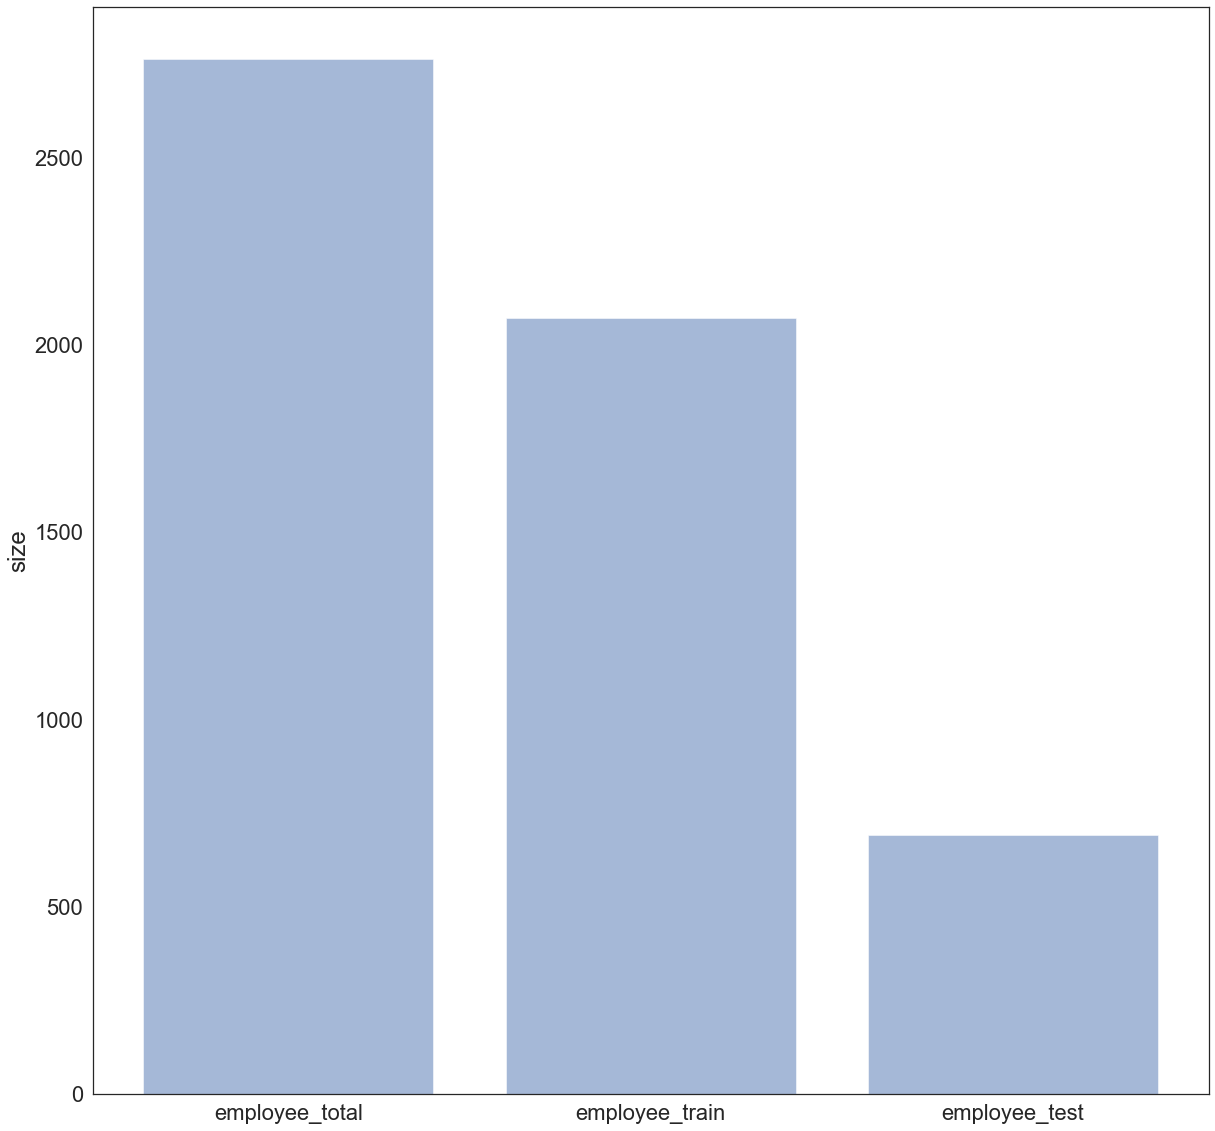

In [348]:
portion = ('employee_total', 'employee_train', 'employee_test')
y_pos = np.arange(len(portion))
size = [2764,2073,691]

plt.bar(y_pos, size, align='center', alpha=0.5)
plt.xticks(y_pos, portion)
plt.ylabel('size')

plt.show()

### Separate data frames for interested predictor variables and response variable

#### *Data of most interest variables

In [436]:
#---Training set---

x = employee_train[['PaymentTier', 'Gender', 'EverBenched']]
x = pd.get_dummies(x)
y = employee_train[['LeaveOrNot']]
#x_names = ['PaymentTier', 'Gender_Female', 'Gender_Male', 'EverBenched_No', 'EverBenched_Yes', '?']
#x_names = x.columns.values
y_names = ["No", "Yes"]

#---Test set---

x_test = employee_test[['PaymentTier', 'Gender',  'EverBenched']]
x_test = pd.get_dummies(x_test)
y_test = employee_test[['LeaveOrNot']]
#x_test_names = x_test.columns
y_test_names = ["No", "Yes"]

x.head()

,PaymentTier,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
744,3,1,0,1,0
1165,1,1,0,1,0
845,3,1,0,1,0
595,3,1,0,1,0
1469,3,1,0,1,0


#### *Data of most interest variables and maybe-variables

In [455]:
#---Training set---

x2 = employee_train[['PaymentTier', 'Gender',  'EverBenched', 'Education', 'Duration', 'City']]
x2 = pd.get_dummies(x2)
y = employee_train[['LeaveOrNot']]
y_names = ["No", "Yes"]
#---Test set---

x_test2 = employee_test[['PaymentTier', 'Gender',  'EverBenched', 'Education', 'Duration', 'City']]
x_test2 = pd.get_dummies(x_test2)
y_test = employee_test[['LeaveOrNot']]

#### *Data for all predictor variables

In [531]:
#---Training set---

x3 = employee_train.drop(['LeaveOrNot'], axis= 1)
x3 = pd.get_dummies(x3)
y = employee_train[['LeaveOrNot']]
y_names = ["No", "Yes"]
#---Test set---

x_test3 = employee_test.drop(['LeaveOrNot'], axis= 1)
x_test3 = pd.get_dummies(x_test3)
y_test = employee_test[['LeaveOrNot']]

x3


,PaymentTier,Age,ExperienceInCurrentDomain,Duration,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
744,3,26,4,2,1,0,0,0,1,0,1,0,1,0
1165,1,27,5,4,0,1,0,0,0,1,1,0,1,0
845,3,25,3,6,0,1,0,0,1,0,1,0,1,0
595,3,28,1,7,1,0,0,1,0,0,1,0,1,0
1469,3,36,5,3,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,3,33,0,8,1,0,0,1,0,0,1,0,0,1
2550,3,31,5,6,1,0,0,1,0,0,0,1,1,0
537,2,25,3,3,0,1,0,0,0,1,0,1,1,0
1220,2,29,2,3,0,1,0,0,1,0,0,1,1,0


### Build Models

### 1. C5.0 Model

#####  1.1 C5 For most interested variable

In [461]:
#Run C5.0 using entropy criterion
C5_1 = DecisionTreeClassifier(criterion = "entropy", \
                                max_leaf_nodes = 20, \
                                min_samples_leaf= 75).fit(x,y)
export_graphviz (C5_1, out_file = 'C5_1.dot')

#predict income in training data set
y_train_pred = C5_1.predict(x)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0])

[Text(253.63636363636363, 391.392, 'Gender_Male <= 0.5\nentropy = 0.964\nsamples = 2073\nvalue = [1266, 807]\nclass = No'),
 Text(152.1818181818182, 304.416, 'PaymentTier <= 2.5\nentropy = 1.0\nsamples = 913\nvalue = [460, 453]\nclass = No'),
 Text(101.45454545454545, 217.44, 'PaymentTier <= 1.5\nentropy = 0.933\nsamples = 364\nvalue = [127, 237]\nclass = Yes'),
 Text(50.72727272727273, 130.464, 'entropy = 1.0\nsamples = 89\nvalue = [44, 45]\nclass = Yes'),
 Text(152.1818181818182, 130.464, 'entropy = 0.884\nsamples = 275\nvalue = [83, 192]\nclass = Yes'),
 Text(202.9090909090909, 217.44, 'entropy = 0.967\nsamples = 549\nvalue = [333, 216]\nclass = No'),
 Text(355.09090909090907, 304.416, 'PaymentTier <= 1.5\nentropy = 0.888\nsamples = 1160\nvalue = [806, 354]\nclass = No'),
 Text(304.3636363636364, 217.44, 'entropy = 0.701\nsamples = 79\nvalue = [64, 15]\nclass = No'),
 Text(405.8181818181818, 217.44, 'PaymentTier <= 2.5\nentropy = 0.897\nsamples = 1081\nvalue = [742, 339]\nclass = No

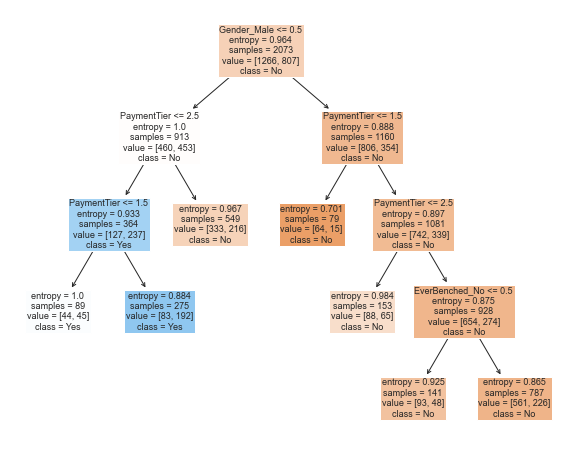

In [463]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5_1, feature_names=x.columns.values, filled=True,
         class_names=y_names)

In [482]:
#make prediction
y_pred = C5_1.predict(x_test)

y_actual = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')

#create confusion matrix
tab1 = pd.crosstab(y_actual, y_predicted)
tab1['Total'] = tab1.sum(axis =1)
tab1.loc['Total'] = tab1.sum()
tab1

Predicted,0,1,Total
Actual,,,
0,88,10,98
1,60,16,76
Total,148,26,174


In [537]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [541]:
accuracy_score(y_test, y_pred)

0.6497829232995659

In [539]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6497829232995659
Precision: 0.6585365853658537
Recall: 0.28825622775800713


#### 1.2 C5 For most interested variables and maybe-variables

In [473]:
#Run C5.0 using entropy criterion
C5_2 = DecisionTreeClassifier(criterion = "entropy", \
                                max_leaf_nodes = 10, \
                                min_samples_leaf= 75).fit(x2,y)
export_graphviz (C5_2, out_file = 'C5_2.dot')

#predict income in training data set
y_train_pred2 = C5_2.predict(x2)
y_train_pred2

array([1, 0, 0, ..., 0, 0, 0])

[Text(260.40000000000003, 398.64, 'Duration <= 2.5\nentropy = 0.964\nsamples = 2073\nvalue = [1266, 807]\nclass = No'),
 Text(223.20000000000002, 326.15999999999997, 'entropy = 0.127\nsamples = 171\nvalue = [3, 168]\nclass = Yes'),
 Text(297.6, 326.15999999999997, 'PaymentTier <= 2.5\nentropy = 0.921\nsamples = 1902\nvalue = [1263, 639]\nclass = No'),
 Text(148.8, 253.67999999999998, 'Duration <= 3.5\nentropy = 0.998\nsamples = 582\nvalue = [276, 306]\nclass = Yes'),
 Text(74.4, 181.2, 'Gender_Male <= 0.5\nentropy = 0.944\nsamples = 263\nvalue = [168, 95]\nclass = No'),
 Text(37.2, 108.71999999999997, 'entropy = 0.997\nsamples = 126\nvalue = [67, 59]\nclass = No'),
 Text(111.60000000000001, 108.71999999999997, 'entropy = 0.831\nsamples = 137\nvalue = [101, 36]\nclass = No'),
 Text(223.20000000000002, 181.2, 'PaymentTier <= 1.5\nentropy = 0.923\nsamples = 319\nvalue = [108, 211]\nclass = Yes'),
 Text(186.0, 108.71999999999997, 'entropy = 0.971\nsamples = 130\nvalue = [78, 52]\nclass = N

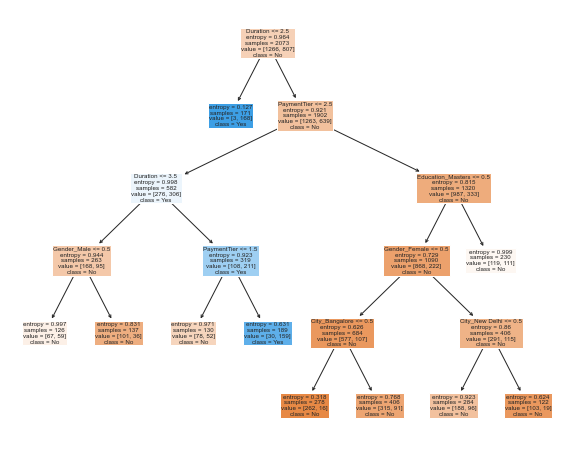

In [474]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5_2, feature_names=x2.columns.values, filled=True,
         class_names=y_names)

In [468]:
#make prediction
y_pred2 = C5_2.predict(x_test2)

y_actual = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted2 = pd.Series(y_pred2, name='Predicted')

#create confusion matrix
tab2 = pd.crosstab(y_actual, y_predicted2)
tab2['Total'] = tab2.sum(axis =1)
tab2.loc['Total'] = tab2.sum()
tab2

Predicted,0,1,Total
Actual,,,
0,79,19,98
1,56,20,76
Total,135,39,174


#### 1.3  C5 For all variables

In [475]:
#Run C5.0 using entropy criterion
C5_3 = DecisionTreeClassifier(criterion = "entropy", \
                                max_leaf_nodes = 10, \
                                min_samples_leaf= 75).fit(x3,y)
export_graphviz (C5_3, out_file = 'C5_3.dot')

#predict income in training data set
y_train_pred3 = C5_3.predict(x3)
y_train_pred3

array([1, 0, 0, ..., 1, 0, 0])

[Text(260.40000000000003, 398.64, 'Duration <= 2.5\nentropy = 0.964\nsamples = 2073\nvalue = [1266, 807]\nclass = No'),
 Text(223.20000000000002, 326.15999999999997, 'entropy = 0.127\nsamples = 171\nvalue = [3, 168]\nclass = Yes'),
 Text(297.6, 326.15999999999997, 'PaymentTier <= 2.5\nentropy = 0.921\nsamples = 1902\nvalue = [1263, 639]\nclass = No'),
 Text(148.8, 253.67999999999998, 'Duration <= 3.5\nentropy = 0.998\nsamples = 582\nvalue = [276, 306]\nclass = Yes'),
 Text(74.4, 181.2, 'Age <= 27.5\nentropy = 0.944\nsamples = 263\nvalue = [168, 95]\nclass = No'),
 Text(37.2, 108.71999999999997, 'entropy = 0.997\nsamples = 92\nvalue = [43, 49]\nclass = Yes'),
 Text(111.60000000000001, 108.71999999999997, 'entropy = 0.84\nsamples = 171\nvalue = [125, 46]\nclass = No'),
 Text(223.20000000000002, 181.2, 'PaymentTier <= 1.5\nentropy = 0.923\nsamples = 319\nvalue = [108, 211]\nclass = Yes'),
 Text(186.0, 108.71999999999997, 'entropy = 0.971\nsamples = 130\nvalue = [78, 52]\nclass = No'),
 Te

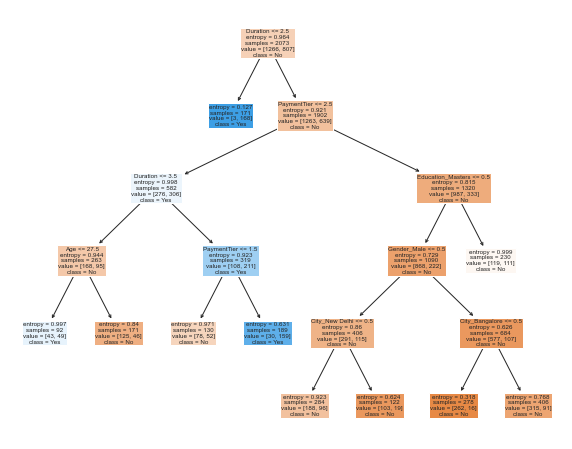

In [477]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5_3, feature_names=x3.columns.values, filled=True,
         class_names=y_names)

In [478]:
#make prediction
y_pred3 = C5_3.predict(x_test3)

y_actual = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted3 = pd.Series(y_pred3, name='Predicted')

#create confusion matrix
tab3 = pd.crosstab(y_actual, y_predicted3)
tab3['Total'] = tab3.sum(axis =1)
tab3.loc['Total'] = tab3.sum()
tab3

Predicted,0,1,Total
Actual,,,
0,79,19,98
1,51,25,76
Total,130,44,174


### 2. Random Forest Model

#####  2.1 Random Foresr for the most interested variables

In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import random

In [488]:
#Change response variable to one-dimension array 
rfy = np.ravel(y)

In [493]:
#The n_estimators= 100, criterion  = "gini" id default (don't have to specufy)--
#--set max_depth to limit the depth of the tree, or limit branches
#--Set random_state for reproducible results
rf1 = RandomForestClassifier(n_estimators = 100, \
                              criterion = "gini", max_depth=3, random_state = 42).fit(x,rfy)

y_train_pred = rf1.predict(x)
y_train_pred 
      

array([0, 1, 0, ..., 0, 0, 0])

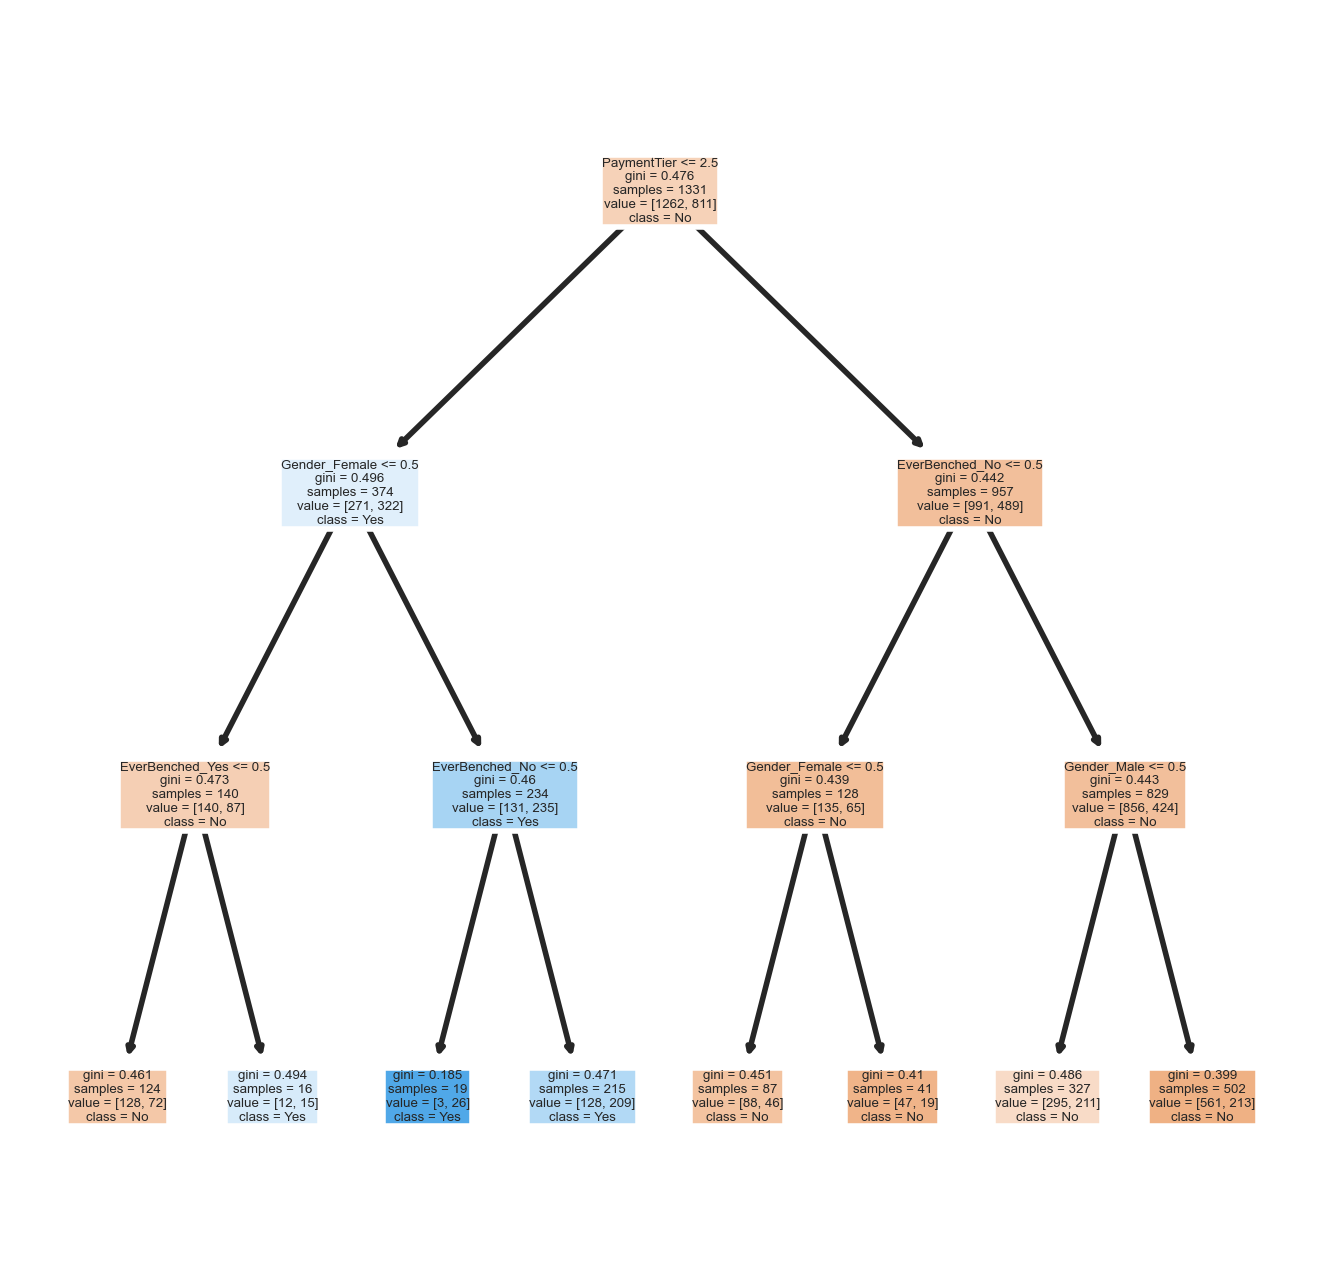

In [496]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
#use .estimator[] to specify individual tree 
tree.plot_tree(rf1.estimators_[0],
               feature_names = x.columns.values, 
               class_names=y_names,
               filled = True);
fig.savefig('rf_individualtree.png')

In [495]:
#Make prediction
y_pred = rf1.predict(x_test)

#count number of predict for each class
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 568, 1: 123}

In [497]:
accuracy_score(y_test, y_pred)

0.6497829232995659

In [505]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

In [512]:
#Feature importance
feature_scores = pd.Series(rf1.feature_importances_, index= x.columns).sort_values(ascending=False)

feature_scores

PaymentTier        0.504082
Gender_Male        0.241819
Gender_Female      0.207463
EverBenched_Yes    0.024675
EverBenched_No     0.021961
dtype: float64

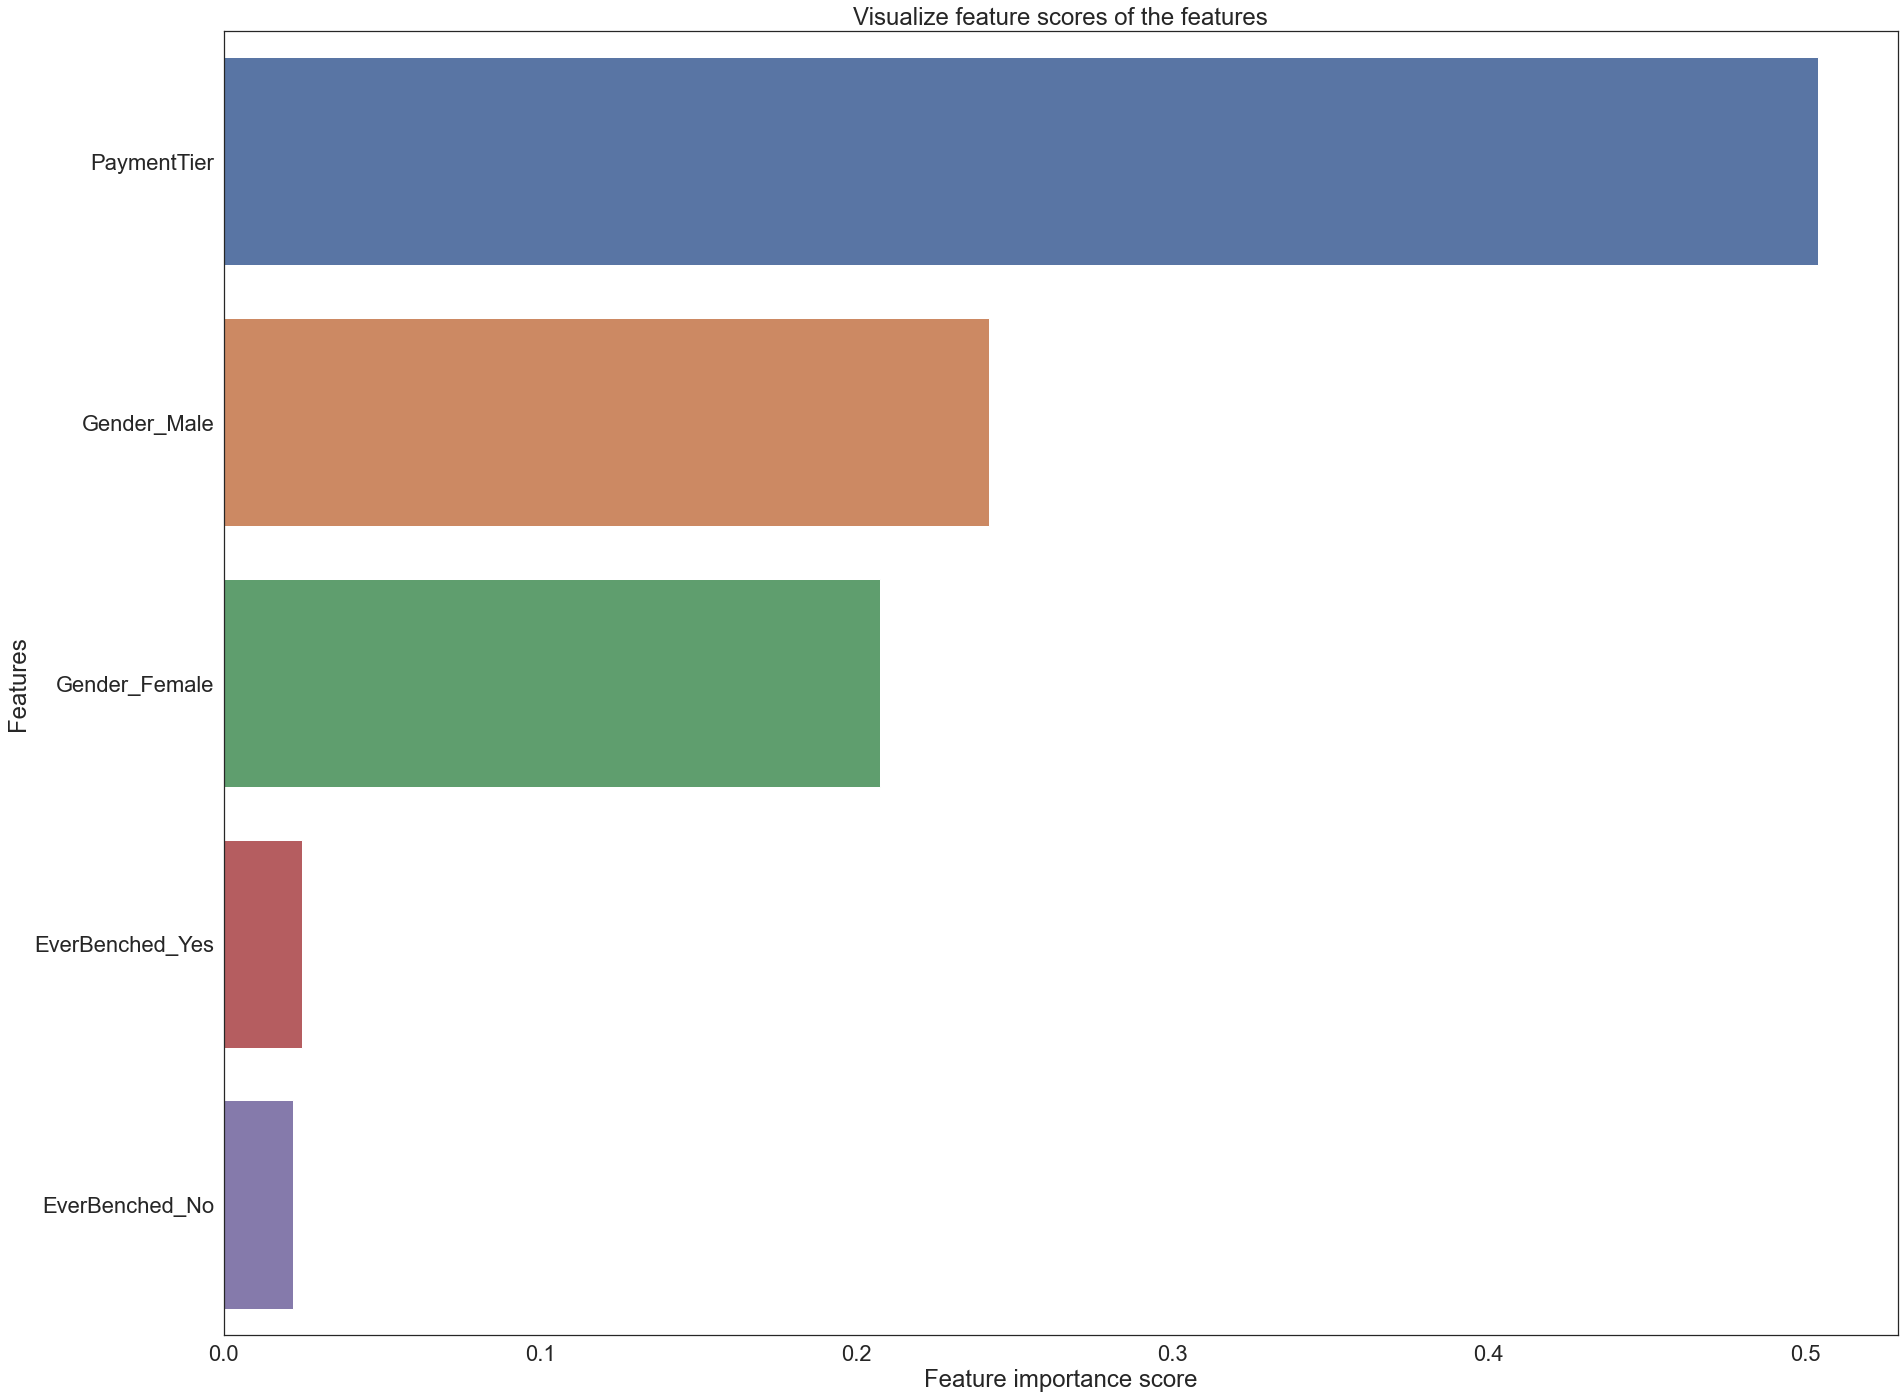

In [514]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=employee_train[['PaymentTier', 'Gender', 'EverBenched']])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### 1.2 Random Forest  for most interested variables and maybe-variables

In [ ]:
#Change response variable to one-dimension array 
rfy = np.ravel(y)

In [516]:
#The n_estimators= 100, criterion  = "gini" id default (don't have to specufy)--
#--set max_depth to limit the depth of the tree, or limit branches
#--Set random_state for reproducible results
rf2 = RandomForestClassifier(n_estimators = 100, \
                              criterion = "gini", max_depth=3, random_state = 42).fit(x2,rfy)

y_train_pred2 = rf2.predict(x2)
y_train_pred2 
      

array([1, 1, 0, ..., 0, 0, 0])

In [517]:
#Make prediction
y_pred2 = rf2.predict(x_test2)

#count number of predict for each class
unique, counts = np.unique(y_pred2, return_counts=True)
dict(zip(unique, counts))

{0: 558, 1: 133}

In [534]:
accuracy_score(y_test, y_pred2)

0.7424023154848046

In [542]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.7424023154848046
Precision: 0.8872180451127819
Recall: 0.4199288256227758


In [518]:
#Feature importance
feature_scores2 = pd.Series(rf2.feature_importances_, index= x2.columns).sort_values(ascending=False)

feature_scores2

Duration               0.450199
PaymentTier            0.134579
Gender_Female          0.102974
City_Pune              0.074531
Gender_Male            0.070350
Education_Masters      0.065227
Education_Bachelors    0.047993
City_Bangalore         0.020149
City_New Delhi         0.016921
Education_PHD          0.008748
EverBenched_Yes        0.004678
EverBenched_No         0.003649
dtype: float64

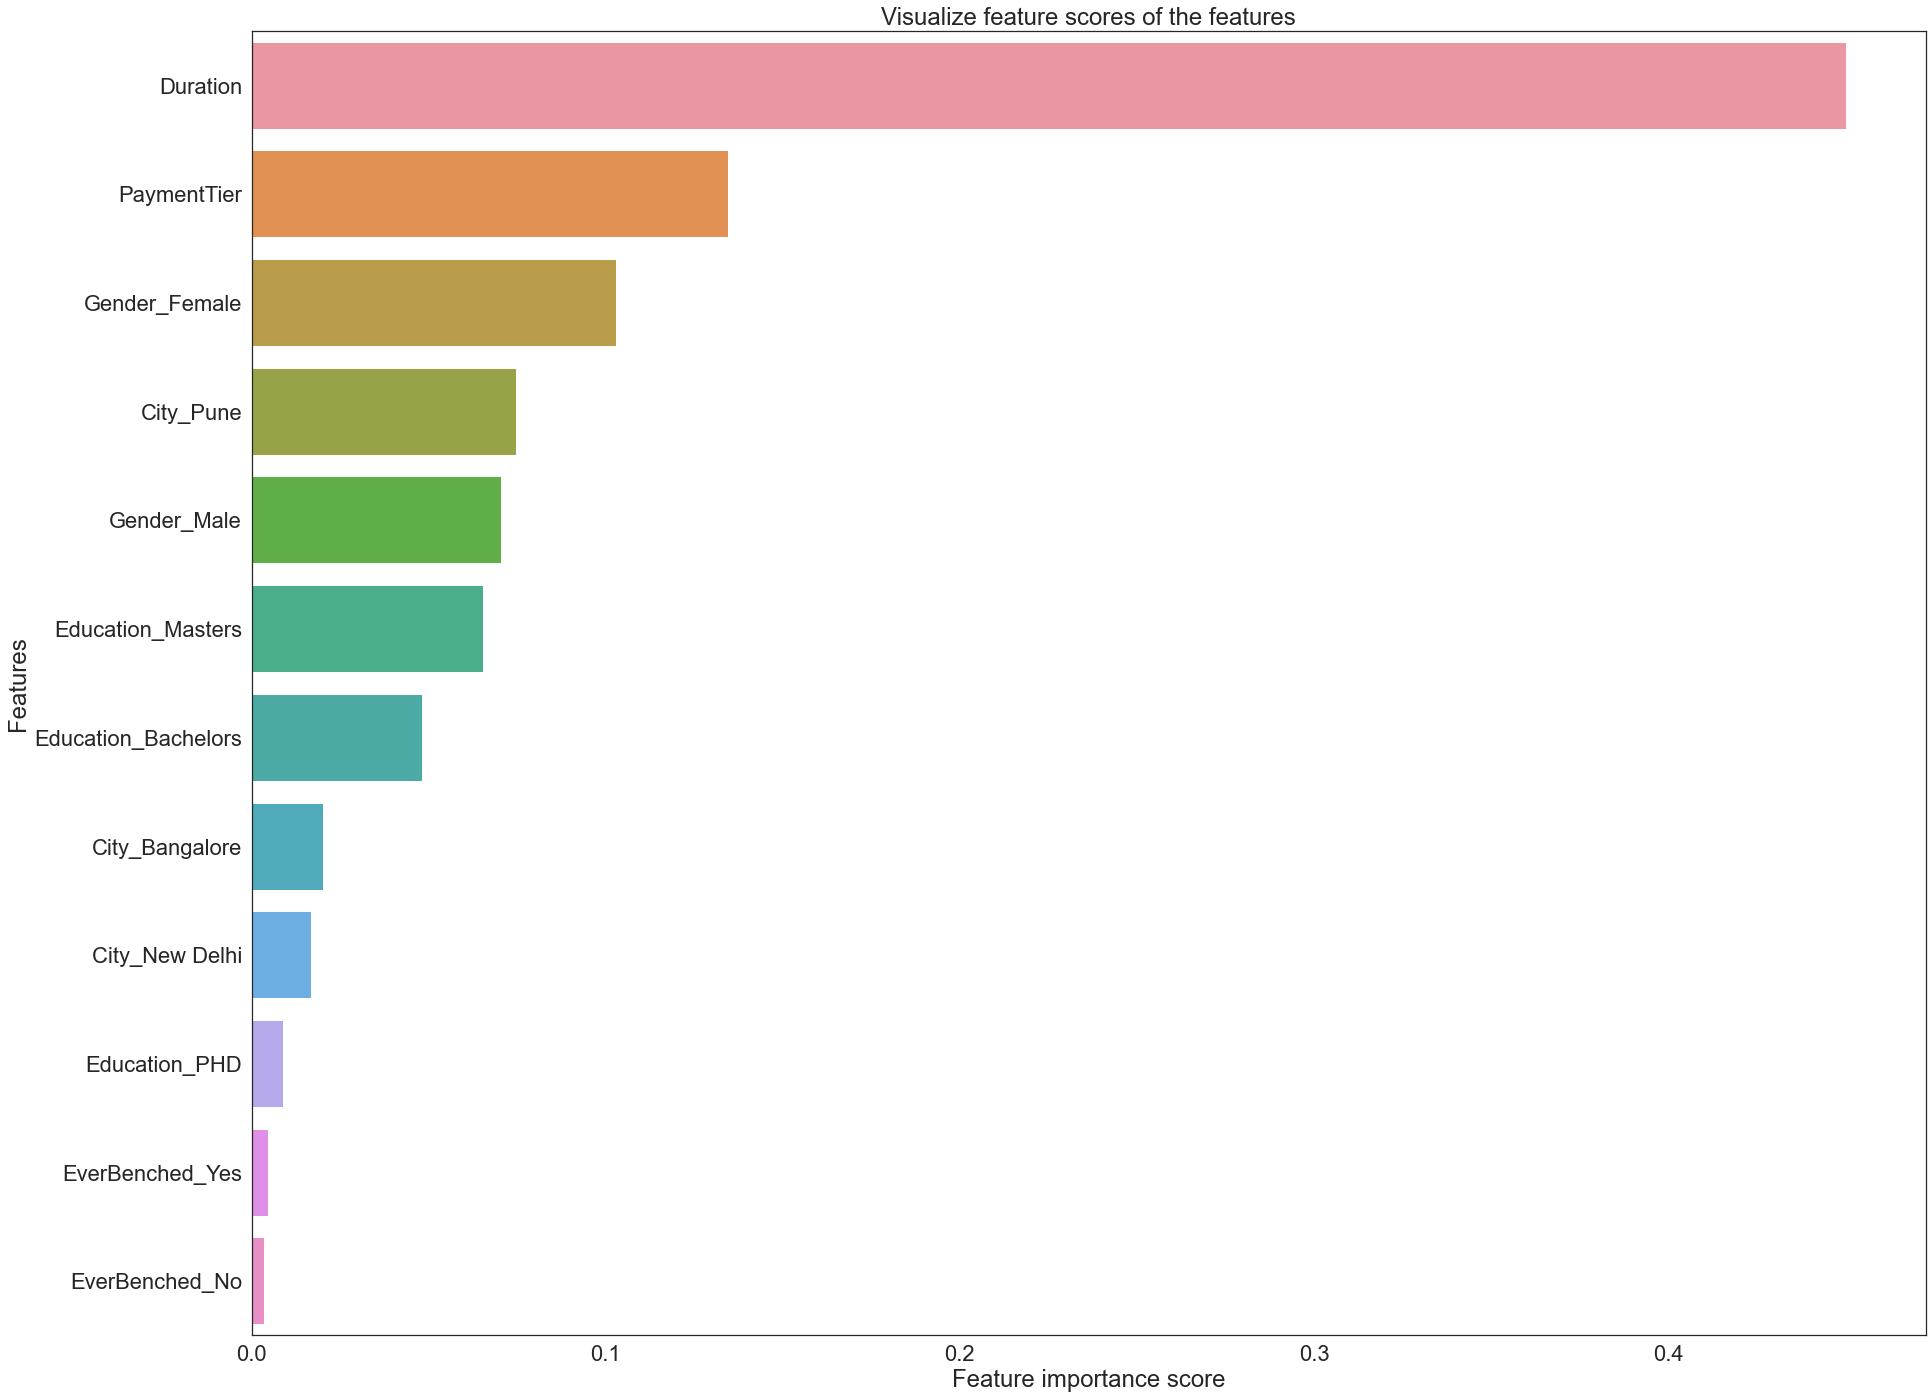

In [523]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores2, y=feature_scores2.index, data=employee_train[['PaymentTier', 'Gender',  'EverBenched', 'Education', 'Duration', 'City']])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores2.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### 1.2 Random Forest  for all variables

In [528]:
rfy = np.ravel(y)
rf3 = RandomForestClassifier(n_estimators = 100, \
                              criterion = "gini", max_depth=3, random_state = 42).fit(x3,rfy)


In [529]:
#Make prediction
y_pred3 = rf3.predict(x_test3)

#count number of predict for each class
unique, counts = np.unique(y_pred3, return_counts=True)
dict(zip(unique, counts))

{0: 558, 1: 133}

In [544]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.7452966714905933
Precision: 0.8947368421052632
Recall: 0.4234875444839858


In [530]:
#Feature importance
feature_scores3 = pd.Series(rf3.feature_importances_, index= x3.columns).sort_values(ascending=False)

feature_scores3

Duration                     0.405811
Gender_Male                  0.118258
PaymentTier                  0.110161
Gender_Female                0.072584
Age                          0.053788
City_Pune                    0.053273
Education_Masters            0.052891
Education_Bachelors          0.046631
City_Bangalore               0.027508
index                        0.017123
Education_PHD                0.013556
City_New Delhi               0.011524
ExperienceInCurrentDomain    0.010672
EverBenched_Yes              0.003385
EverBenched_No               0.002834
dtype: float64

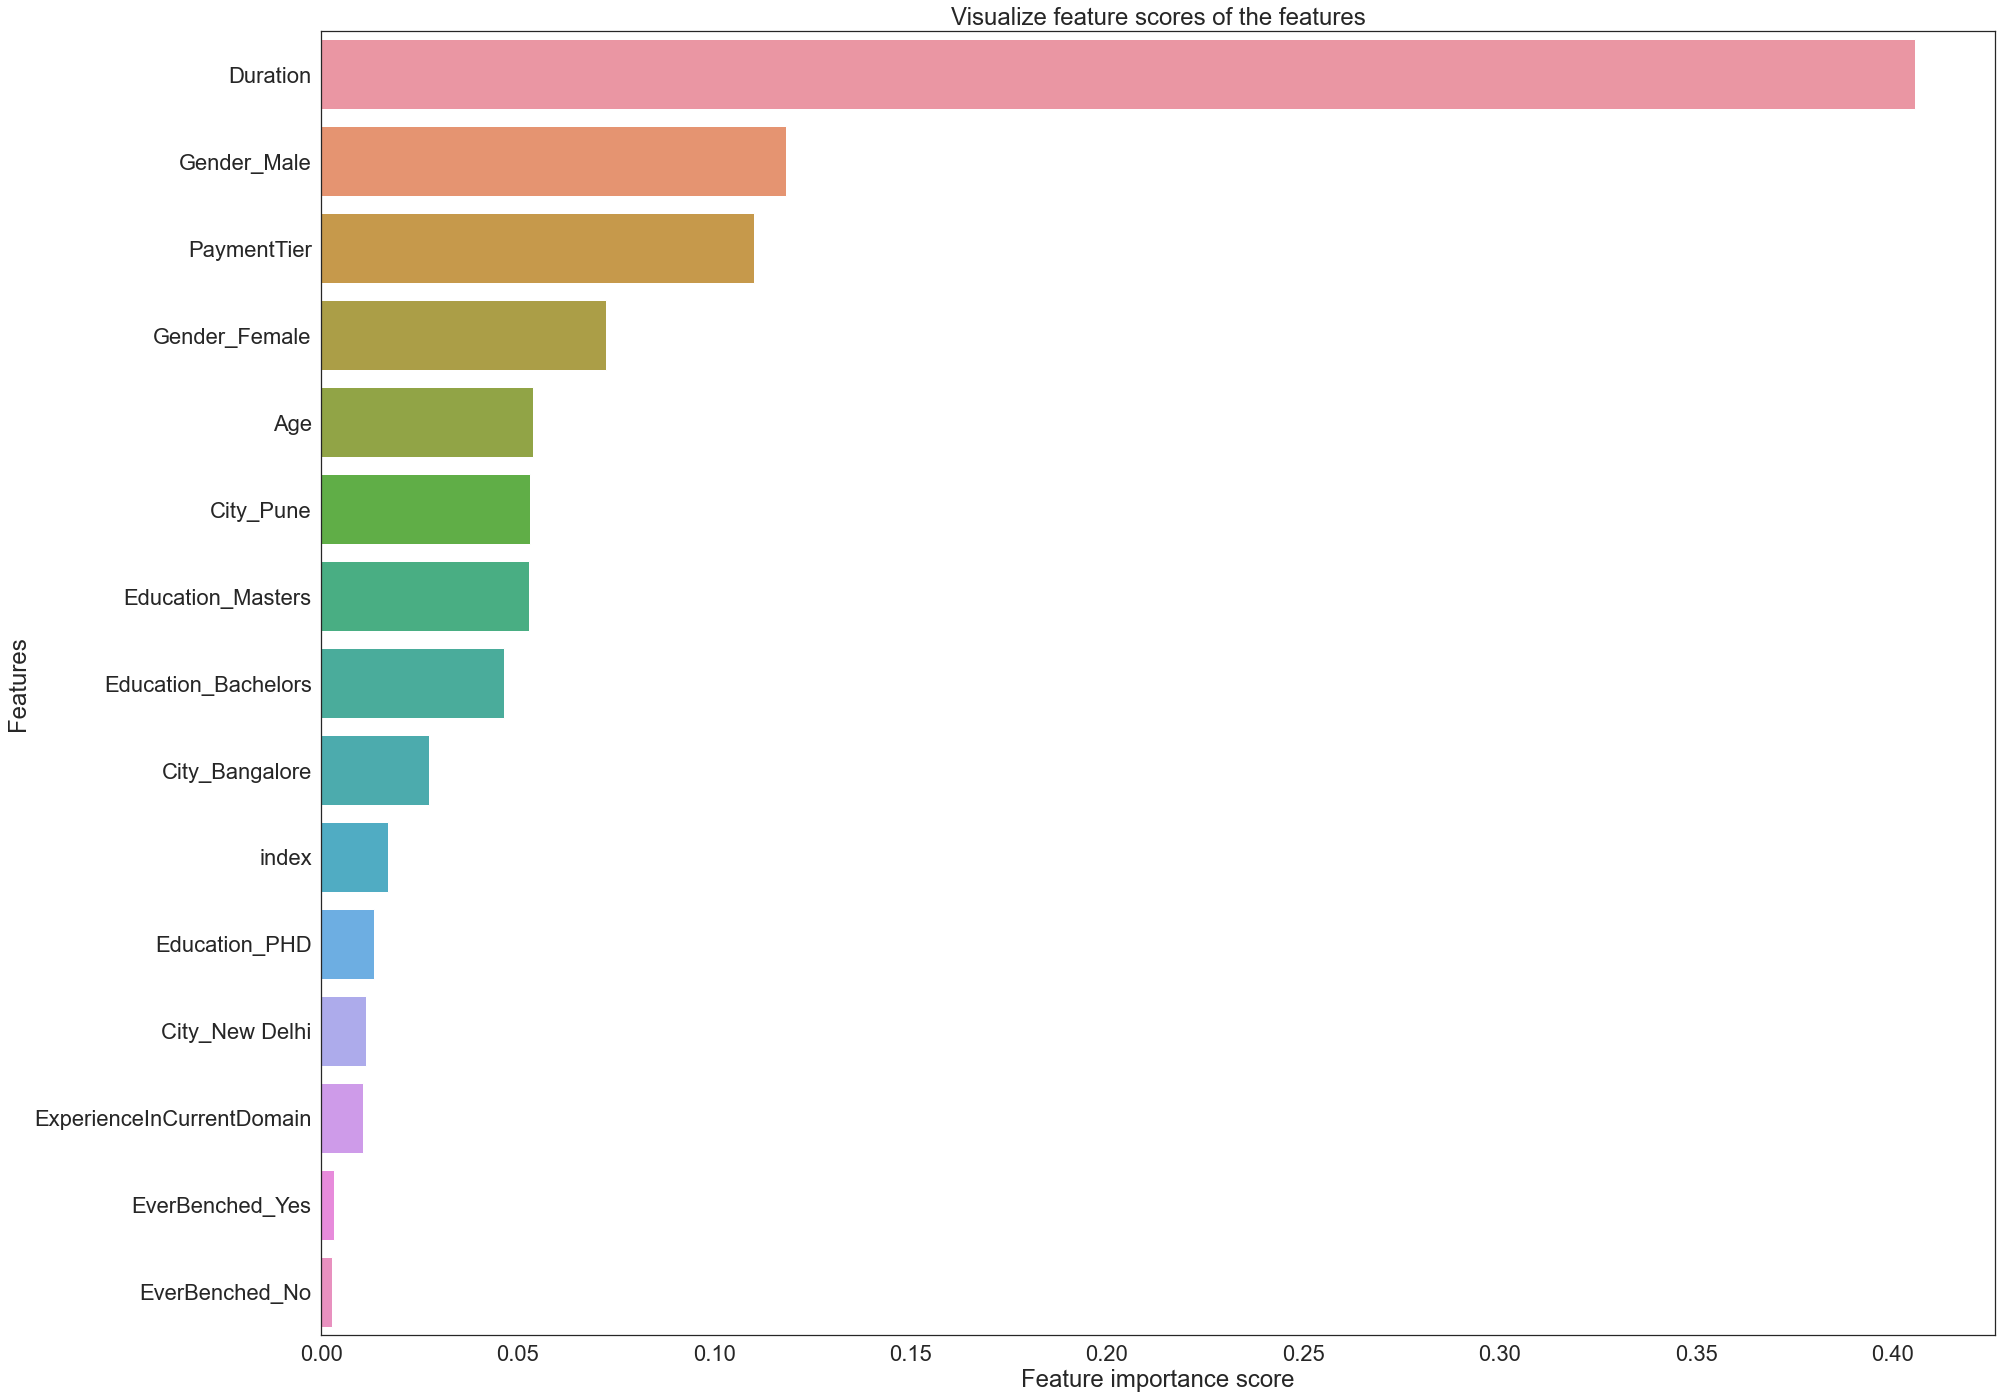

In [532]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores3, y=feature_scores3.index, data=x3)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores3.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()